# Part 3 - texto

- maior/menor louvor
- word length (maybe)
- bag-of-words with frequency
- gensim corpus
- tf-idf
- named entity recognition (spacy or polyglot)
- next: category classification for avulsos

## Maior e menor louvor

In [17]:
import pandas as pd

hinos_analise = pd.read_pickle("assets/hinos_analise.pkl")
hinos_analise = hinos_analise.set_index("numero").drop(columns=["texto"])
hinos_analise["categoria_abr"] = hinos_analise["categoria"].apply(
    lambda x: x[:13] + "..." if len(x) > 15 else x
)
hinos_analise

,nome,texto_limpo,categoria_id,categoria,categoria_abr
numero,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,CLAMOR
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,CLAMOR
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,CLAMOR
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,CLAMOR
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,CLAMOR
...,...,...,...,...,...
790,AQUELE QUE HABITA NO ESCONDERIJO,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,11,CORINHOS,CORINHOS
791,EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,CORINHOS
792,LOUVANDO A DEUS,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,CORINHOS


In [18]:
import nltk
from tqdm import tqdm

nltk.download("stopwords")

stopwords = nltk.corpus.stopwords.words("portuguese")
text = []
text_no_stops = []

for hino in tqdm(hinos_analise.to_dict("records")):
    tokens = nltk.tokenize.regexp_tokenize(hino["texto_limpo"], r"\w+")
    tokens = [
        palavra for palavra in tokens if palavra != "CORO"
    ]
    tokens_no_stops = [
        palavra for palavra in tokens if palavra.lower() not in stopwords
    ]
    text.append(tokens)
    text_no_stops.append(tokens_no_stops)

hinos_analise["tokens"] = text
hinos_analise["tokens_no_stops"] = text_no_stops
# considerando numero total de palavras, pois todas elas tem que ser cantadas, logo impactam no tamanho prático do hino
hinos_analise["num_tokens"] = hinos_analise["tokens"].apply(len)
hinos_analise

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ISSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 795/795 [00:00<00:00, 4141.40it/s]


,nome,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,CLAMOR,"[AQUILO, QUE, FUI, NÃO, SOU, MAIS, NEM, SOU, T...","[TUDO, DEVO, GRAÇA, VÊ, LO, CERTO, VOU, GLÓRIA...",96
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,CLAMOR,"[O, SANGUE, DE, JESUS, TEM, PODER, PODER, QUE,...","[SANGUE, JESUS, PODER, PODER, MIM, PODE, VALER...",79
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,CLAMOR,"[O, SANGUE, DE, JESUS, TEM, PODER, O, SANGUE, ...","[SANGUE, JESUS, PODER, SANGUE, JESUS, SANGUE, ...",50
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,CLAMOR,"[CLAMO, A, TI, Ó, MEU, SENHOR, CLAMO, A, TI, M...","[CLAMO, TI, Ó, SENHOR, CLAMO, TI, SALVADOR, SA...",45
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,CLAMOR,"[QUANDO, TE, PROSTRARES, DIANTE, DE, DEUS, LEM...","[PROSTRARES, DIANTE, DEUS, LEMBRA, JESUS, CONT...",52
...,...,...,...,...,...,...,...,...
790,AQUELE QUE HABITA NO ESCONDERIJO,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,11,CORINHOS,CORINHOS,"[AQUELE, QUE, HABITA, NO, ESCONDERIJO, DO, ALT...","[HABITA, ESCONDERIJO, ALTÍSSIMO, SOMBRA, SENHO...",43
791,EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,CORINHOS,"[EU, QUERO, MAIS, E, MAIS, DE, CRISTO, EU, QUE...","[QUERO, CRISTO, QUERO, PODER, QUERO, PRESENÇA,...",46
792,LOUVANDO A DEUS,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,CORINHOS,"[LOUVANDO, A, DEUS, E, CAINDO, NA, GRAÇA, DE, ...","[LOUVANDO, DEUS, CAINDO, GRAÇA, TODO, POVO, TO...",29


In [19]:
display(hinos_analise.sort_values("num_tokens", ascending=False))
display(hinos_analise.sort_values("num_tokens", ascending=True))

,nome,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,
731,SEQUÊNCIA DE LOUVORES Nº 1,"A DESDE O DIA EM QUE ACEITEI JESUS, A MINHA VI...",11,CORINHOS,CORINHOS,"[A, DESDE, O, DIA, EM, QUE, ACEITEI, JESUS, A,...","[DESDE, DIA, ACEITEI, JESUS, VIDA, TRANSFORMOU...",261
364,DÁ-ME MAIS FÉ,DÁ-ME MAIS FÉ PRA QUE O MEU CHORO SOMENTE ESTA...,5,CONSOLO E ENCORAJAMENTO,CONSOLO E ENC...,"[DÁ, ME, MAIS, FÉ, PRA, QUE, O, MEU, CHORO, SO...","[DÁ, FÉ, PRA, CHORO, SOMENTE, NOITE, POSSA, DU...",236
466,EIS O ESTANDARTE,"EIS O ESTANDARTE TREMULANDO À LUZ, EIS A SUA D...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,SANTIFICAÇÃO ...,"[EIS, O, ESTANDARTE, TREMULANDO, À, LUZ, EIS, ...","[EIS, ESTANDARTE, TREMULANDO, LUZ, EIS, DIVISA...",226
707,"EU CONFIO EM TI, SENHOR","EU CONFIO EM TI, SENHOR! MESMO QUANDO TUDO NÃO...",10,GRUPO DE LOUVOR,GRUPO DE LOUVOR,"[EU, CONFIO, EM, TI, SENHOR, MESMO, QUANDO, TU...","[CONFIO, TI, SENHOR, TUDO, VAI, BEM, ESPERANÇA...",208
371,TODA PROMESSA,"TODA PROMESSA, TODA PALAVRA QUE O SENHOR FALOU...",5,CONSOLO E ENCORAJAMENTO,CONSOLO E ENC...,"[TODA, PROMESSA, TODA, PALAVRA, QUE, O, SENHOR...","[TODA, PROMESSA, TODA, PALAVRA, SENHOR, FALOU,...",189
...,...,...,...,...,...,...,...,...
192,"JESUS, JESUS, EU TE AMO","JESUS, JESUS, EU TE AMO, Ó MEU SALVADOR; EU TE...",3,DEDICAÇÃO,DEDICAÇÃO,"[JESUS, JESUS, EU, TE, AMO, Ó, MEU, SALVADOR, ...","[JESUS, JESUS, AMO, Ó, SALVADOR, QUERO, ESPERO...",18
738,"GLÓRIA, GLÓRIA","GLÓRIA, GLÓRIA, GLÓRIA AO SENHOR JESUS. DELE É...",11,CORINHOS,CORINHOS,"[GLÓRIA, GLÓRIA, GLÓRIA, AO, SENHOR, JESUS, DE...","[GLÓRIA, GLÓRIA, GLÓRIA, SENHOR, JESUS, GLÓRIA...",18
19,TEU POVO CLAMA,"TEU POVO CLAMA EM ORAÇÃO PELO TEU SANGUE, LIBE...",1,CLAMOR,CLAMOR,"[TEU, POVO, CLAMA, EM, ORAÇÃO, PELO, TEU, SANG...","[POVO, CLAMA, ORAÇÃO, SANGUE, LIBERTAÇÃO, PECA...",17


,nome,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,
15,"CLAMAREI, CLAMAREI","CLAMAREI, CLAMAREI PELO SANGUE DE JESUS; ELE É...",1,CLAMOR,CLAMOR,"[CLAMAREI, CLAMAREI, PELO, SANGUE, DE, JESUS, ...","[CLAMAREI, CLAMAREI, SANGUE, JESUS, PAZ, SEGUR...",15
13,PÕE TEU SANGUE SOBRE MIM,"PÕE TEU SANGUE SOBRE MIM, PORÇÃO DOBRADA, Ó S...",1,CLAMOR,CLAMOR,"[PÕE, TEU, SANGUE, SOBRE, MIM, PORÇÃO, DOBRADA...","[PÕE, SANGUE, SOBRE, MIM, PORÇÃO, DOBRADA, Ó, ...",16
19,TEU POVO CLAMA,"TEU POVO CLAMA EM ORAÇÃO PELO TEU SANGUE, LIBE...",1,CLAMOR,CLAMOR,"[TEU, POVO, CLAMA, EM, ORAÇÃO, PELO, TEU, SANG...","[POVO, CLAMA, ORAÇÃO, SANGUE, LIBERTAÇÃO, PECA...",17
738,"GLÓRIA, GLÓRIA","GLÓRIA, GLÓRIA, GLÓRIA AO SENHOR JESUS. DELE É...",11,CORINHOS,CORINHOS,"[GLÓRIA, GLÓRIA, GLÓRIA, AO, SENHOR, JESUS, DE...","[GLÓRIA, GLÓRIA, GLÓRIA, SENHOR, JESUS, GLÓRIA...",18
192,"JESUS, JESUS, EU TE AMO","JESUS, JESUS, EU TE AMO, Ó MEU SALVADOR; EU TE...",3,DEDICAÇÃO,DEDICAÇÃO,"[JESUS, JESUS, EU, TE, AMO, Ó, MEU, SALVADOR, ...","[JESUS, JESUS, AMO, Ó, SALVADOR, QUERO, ESPERO...",18
...,...,...,...,...,...,...,...,...
371,TODA PROMESSA,"TODA PROMESSA, TODA PALAVRA QUE O SENHOR FALOU...",5,CONSOLO E ENCORAJAMENTO,CONSOLO E ENC...,"[TODA, PROMESSA, TODA, PALAVRA, QUE, O, SENHOR...","[TODA, PROMESSA, TODA, PALAVRA, SENHOR, FALOU,...",189
707,"EU CONFIO EM TI, SENHOR","EU CONFIO EM TI, SENHOR! MESMO QUANDO TUDO NÃO...",10,GRUPO DE LOUVOR,GRUPO DE LOUVOR,"[EU, CONFIO, EM, TI, SENHOR, MESMO, QUANDO, TU...","[CONFIO, TI, SENHOR, TUDO, VAI, BEM, ESPERANÇA...",208
466,EIS O ESTANDARTE,"EIS O ESTANDARTE TREMULANDO À LUZ, EIS A SUA D...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,SANTIFICAÇÃO ...,"[EIS, O, ESTANDARTE, TREMULANDO, À, LUZ, EIS, ...","[EIS, ESTANDARTE, TREMULANDO, LUZ, EIS, DIVISA...",226


C:\Users\ISSE\AppData\Local\Temp\ipykernel_20508\1225322717.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hinos_analise, x='categoria_id', y='num_tokens', palette='viridis')


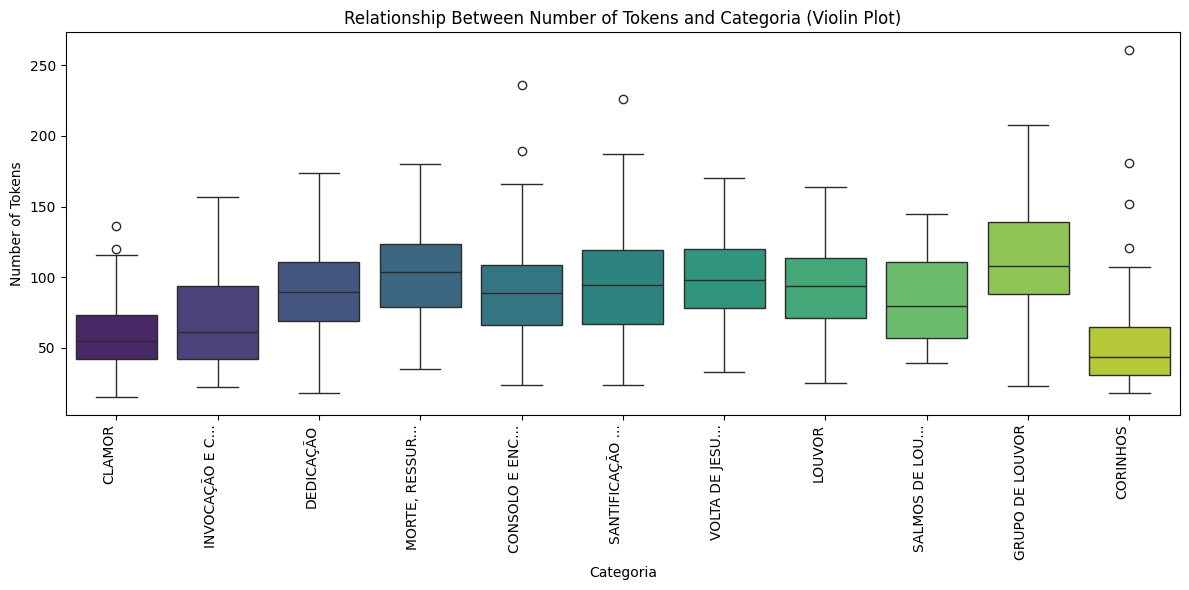

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'categoria_id' is treated as a categorical variable
hinos_analise["categoria_id"] = hinos_analise["categoria_id"].astype("category")

# Create a mapping between categoria_id and categoria
categoria_mapping = (
    hinos_analise[["categoria_id", "categoria_abr"]]
    .drop_duplicates()
    .set_index("categoria_id")["categoria_abr"]
)

# Create a violin plot
plt.figure(figsize=(12, 6))
""" sns.violinplot(
    data=hinos_analise,
    x="categoria_id",
    y="num_tokens",
    palette="viridis",
    inner="quartile",
) """
sns.boxplot(data=hinos_analise, x='categoria_id', y='num_tokens', palette='viridis')

# Replace x-ticks with corresponding 'categoria' names
plt.xticks(
    ticks=range(len(categoria_mapping)),
    labels=categoria_mapping,
    rotation=90,
    ha="right",
)

# Add labels and title
plt.xlabel("Categoria")
plt.ylabel("Number of Tokens")
plt.title("Relationship Between Number of Tokens and Categoria (Violin Plot)")

# Show the plot
plt.tight_layout()
plt.show()

## Word length (maybe)

- bag-of-words with frequency + word map
- gensim corpus
- tf-idf
- named entity recognition (spacy or polyglot)

In [ ]:
import matplotlib.pyplot as plt


tokenized_lines = regexp_tokenize(hinos_analise.iloc[0]["texto_limpo"], r"\w+")
tokenized_lines[:10]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

## Palavras

In [ ]:
palavras = hinos_analise["texto_processado"].str.split().explode().tolist()
palavras = [palavra for palavra in palavras if "CORO" not in palavra]

In [ ]:
print(len(palavras))
set_words_full = list(set(palavras))
count_words = [palavras.count(i) for i in set_words_full]

contagem_palav = pd.DataFrame(
    zip(set_words_full, count_words), columns=["palavra", "contagem"]
)
contagem_palav = contagem_palav.sort_values("contagem", ascending=False).reset_index()
contagem_palav